In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = 0.498
a = 0.552
beta = math.radians(67.5)
alpha = math.pi/2 - beta
h_inclined = h/np.cos(alpha)
#
phi_min = 0.0
phi_max = 90.0
nn = 200
n1 = np.array([0,0,1]).reshape((1,3))
n2 = np.array([1,0,0]).reshape((1,3))
n3 = np.array([0,1,0]).reshape((1,3))
n_inclined_window = np.array([np.cos(math.radians(0.0))*np.sin(math.pi - beta),
                              np.sin(math.radians(0.0))*np.sin(math.pi - beta),
                              np.cos(math.pi - beta)]).reshape((1,3))
print(np.linalg.norm(n1))
print(np.linalg.norm(n2))
print(np.linalg.norm(n3))
print(np.linalg.norm(n_inclined_window))

1.0
1.0
1.0
1.0


In [16]:
#Effective surface of the inclined diagonal mirror geometry
D_big = a*math.sqrt(2)
h_big = h/np.cos(alpha)
a_small = h*math.tan(alpha)
D_small = D_big - 2*a_small
s_diagonal_mirror = (D_big + D_small)/2*h_big
print(s_diagonal_mirror)
print(D_small + a_small*2)

0.30960208669396294
0.7806458864299486


In [19]:
#Paramaters of the inclined diagonal mirror geometry
mirror_RoC = 0.8
mirror_l = math.sqrt(mirror_RoC*mirror_RoC - (D_big*D_big/4))
delta = mirror_RoC - mirror_l
k = D_big/2 + delta
print(k)

0.4920049640679385


In [34]:
def get_n(phi,/):
    n_x = np.cos(phi)*np.sin(math.pi-beta)
    n_y = np.sin(phi)*np.sin(math.pi-beta)
    n_z = np.zeros(n_y.shape)+np.cos(math.pi-beta)
    return np.array([n_x,n_y,n_z])

In [53]:
def get_the_projection_surface(phi,/):
    n = get_n(phi)
    s1 = a*a*np.abs(n1.dot(n)) 
    s2 = a*h*np.abs(n2.dot(n))
    s3 = a*h*np.abs(n3.dot(n))
    #s1 = a*a*n1.dot(n)
    #s2 = a*h*n2.dot(n)
    #s3 = a*h*n3.dot(n)
    stot = s1 + s2 + s3
    #norm = np.max(stot)
    norm = 1
    print('np.max(stot) = ', np.max(stot))
    return s1/norm, s2/norm, s3/norm, (s2+s3)/norm, stot/norm

In [54]:
def get_the_projection_surface_inclined_window(phi,/):
    n = get_n(phi)
    s = h_inclined*a*np.abs(n_inclined_window.dot(n)) 
    #norm = np.max(s)
    norm = 1
    #print('np.max(stot) = ', np.max(stot))
    return s/norm

In [55]:
#phi = math.radians(10)
phi = np.linspace(start=phi_min, stop=phi_max, num=nn)
#phi = np.linspace(start=phi_min, stop=phi_max, num=2)
s1, s2, s3, s23, s = get_the_projection_surface(phi/180.0*math.pi)
s_inc = get_the_projection_surface_inclined_window(phi/180.0*math.pi)

#print(s)

np.max(stot) =  0.47577130805019074


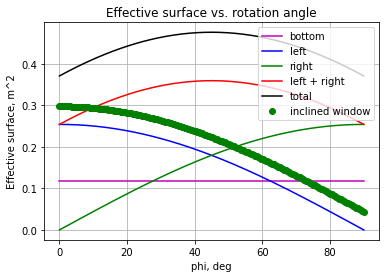

max bottom  =  0.11660517257537231
left  =  0.25397078796922273
right  =  0.25397078796922273
left + right  =  0.35916613547481846
total  =  0.47577130805019074
inclined window  =  0.29754528629157795


In [56]:
#phi=phi.reshape(s1.shape)
plt.plot(phi, np.squeeze(s1),'m-',
         phi, np.squeeze(s2),'b-',
         phi, np.squeeze(s3),'g-',
         phi, np.squeeze(s23),'r-', 
         phi, np.squeeze(s),'k-',
         phi, np.squeeze(s_inc),'go')
plt.xlabel('phi, deg')
plt.ylabel('Effective surface, m^2')
plt.title('Effective surface vs. rotation angle')
plt.grid(True)
legend_tupl = ('bottom', 'left','right','left + right','total','inclined window')
plt.legend(legend_tupl)
plt.savefig("EffectiveSurface.pdf")
plt.show()
print('max ' + legend_tupl[0],' = ',np.max(s1))
print(legend_tupl[1],' = ',np.max(s2))
print(legend_tupl[2],' = ',np.max(s3))
print(legend_tupl[3],' = ',np.max(s23))
print(legend_tupl[4],' = ',np.max(s))
print(legend_tupl[5],' = ',np.max(s_inc))

In [57]:
h/np.cos(math.pi/2 - beta)*a

0.297545286291578

In [58]:
print(type(phi))

<class 'numpy.ndarray'>


In [59]:
aa = h*np.tan(math.pi/2.0 - beta)

In [60]:
ll = math.sqrt(aa*aa+h*h)

In [61]:
ll/4.0/math.tan(math.pi/2 - beta)

0.32533417825421773

In [62]:
ll/4

0.13475782893640303

In [63]:
a/math.cos(math.pi/2 - beta) - 3.0*ll/4.0*math.tan(math.pi/2 - beta)

0.4300249334171665

In [64]:
ll

0.5390313157456121

In [65]:
486/539

0.9016697588126159

In [66]:
0.325/math.sqrt(0.539*0.539/4+0.552*0.552/4)

0.8425055584051363

In [67]:
0.430/math.sqrt(0.539*0.539/4+0.552*0.552/4)

1.1146996618898726

In [68]:
math.sqrt(0.539*0.539+0.552*0.552)

0.7715082630795345

In [69]:
489/772

0.633419689119171

In [70]:
math.sqrt(0.539*0.539/4+0.552*0.552/4)

0.38575413153976723